## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  56.693148  1240.592565  0.108528  5.213618  1.234334
1  40.220329   998.294766  0.516415  9.114578  1.564972
2  90.529877   798.012448  0.823257  4.632506  1.468804
3  18.376724   325.505946  0.598564  5.149196  1.546428
4  65.869912  1134.208632  0.252940  3.854269  1.247424


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0674524	total: 55.4ms	remaining: 55.3s
1:	learn: 1.0559826	total: 56.1ms	remaining: 28s
2:	learn: 1.0468509	total: 57.2ms	remaining: 19s
3:	learn: 1.0363390	total: 61.7ms	remaining: 15.4s
4:	learn: 1.0224585	total: 67.6ms	remaining: 13.5s
5:	learn: 1.0137715	total: 70.9ms	remaining: 11.7s
6:	learn: 1.0021613	total: 71.6ms	remaining: 10.2s
7:	learn: 0.9938959	total: 72.3ms	remaining: 8.96s
8:	learn: 0.9834466	total: 73.3ms	remaining: 8.07s
9:	learn: 0.9712420	total: 74ms	remaining: 7.33s
10:	learn: 0.9620929	total: 77ms	remaining: 6.92s
11:	learn: 0.9515692	total: 77.7ms	remaining: 6.4s
12:	learn: 0.9439059	total: 78.7ms	remaining: 5.98s
13:	learn: 0.9341246	total: 79.3ms	remaining: 5.58s
14:	learn: 0.9229066	total: 79.8ms	remaining: 5.24s
15:	learn: 0.9126263	total: 80.7ms	remaining: 4.96s
16:	learn: 0.9047035	total: 83.2ms	remaining: 4.81s
17:	learn: 0.8979921	total: 84.1ms	remaining: 4.59s
18:	learn: 0.8889763	total: 84.9ms	remaining: 4.38s
1

77:	learn: 0.5343181	total: 137ms	remaining: 1.62s
78:	learn: 0.5288998	total: 137ms	remaining: 1.6s
79:	learn: 0.5240934	total: 138ms	remaining: 1.59s
80:	learn: 0.5201448	total: 139ms	remaining: 1.57s
81:	learn: 0.5168598	total: 139ms	remaining: 1.56s
82:	learn: 0.5135171	total: 142ms	remaining: 1.57s
83:	learn: 0.5091221	total: 143ms	remaining: 1.56s
84:	learn: 0.5058267	total: 144ms	remaining: 1.55s
85:	learn: 0.5022279	total: 145ms	remaining: 1.54s
86:	learn: 0.4985686	total: 145ms	remaining: 1.52s
87:	learn: 0.4946312	total: 146ms	remaining: 1.51s
88:	learn: 0.4912712	total: 147ms	remaining: 1.5s
89:	learn: 0.4868717	total: 148ms	remaining: 1.49s
90:	learn: 0.4827174	total: 148ms	remaining: 1.48s
91:	learn: 0.4791306	total: 149ms	remaining: 1.47s
92:	learn: 0.4750972	total: 150ms	remaining: 1.46s
93:	learn: 0.4716170	total: 150ms	remaining: 1.45s
94:	learn: 0.4678572	total: 151ms	remaining: 1.44s
95:	learn: 0.4651902	total: 152ms	remaining: 1.43s
96:	learn: 0.4617909	total: 152ms

313:	learn: 0.1794224	total: 299ms	remaining: 654ms
314:	learn: 0.1785816	total: 300ms	remaining: 652ms
315:	learn: 0.1777794	total: 301ms	remaining: 652ms
316:	learn: 0.1775707	total: 303ms	remaining: 653ms
317:	learn: 0.1767602	total: 304ms	remaining: 651ms
318:	learn: 0.1759178	total: 304ms	remaining: 649ms
319:	learn: 0.1755057	total: 305ms	remaining: 647ms
320:	learn: 0.1748240	total: 305ms	remaining: 645ms
321:	learn: 0.1742452	total: 306ms	remaining: 644ms
322:	learn: 0.1738301	total: 306ms	remaining: 642ms
323:	learn: 0.1735354	total: 307ms	remaining: 640ms
324:	learn: 0.1731354	total: 307ms	remaining: 638ms
325:	learn: 0.1728455	total: 308ms	remaining: 636ms
326:	learn: 0.1725492	total: 310ms	remaining: 638ms
327:	learn: 0.1717491	total: 310ms	remaining: 636ms
328:	learn: 0.1708737	total: 311ms	remaining: 634ms
329:	learn: 0.1704785	total: 311ms	remaining: 632ms
330:	learn: 0.1701903	total: 312ms	remaining: 630ms
331:	learn: 0.1695069	total: 312ms	remaining: 628ms
332:	learn: 

524:	learn: 0.0899655	total: 442ms	remaining: 400ms
525:	learn: 0.0895574	total: 443ms	remaining: 399ms
526:	learn: 0.0892371	total: 443ms	remaining: 398ms
527:	learn: 0.0891549	total: 446ms	remaining: 399ms
528:	learn: 0.0887569	total: 447ms	remaining: 398ms
529:	learn: 0.0887134	total: 448ms	remaining: 398ms
530:	learn: 0.0883044	total: 451ms	remaining: 398ms
531:	learn: 0.0878791	total: 451ms	remaining: 397ms
532:	learn: 0.0875085	total: 452ms	remaining: 396ms
533:	learn: 0.0871245	total: 452ms	remaining: 394ms
534:	learn: 0.0867705	total: 453ms	remaining: 393ms
535:	learn: 0.0864671	total: 453ms	remaining: 392ms
536:	learn: 0.0861708	total: 454ms	remaining: 391ms
537:	learn: 0.0861289	total: 455ms	remaining: 391ms
538:	learn: 0.0857591	total: 458ms	remaining: 392ms
539:	learn: 0.0857178	total: 459ms	remaining: 391ms
540:	learn: 0.0853771	total: 461ms	remaining: 391ms
541:	learn: 0.0850878	total: 462ms	remaining: 391ms
542:	learn: 0.0850471	total: 463ms	remaining: 390ms
543:	learn: 

625:	learn: 0.0682236	total: 518ms	remaining: 310ms
626:	learn: 0.0680255	total: 519ms	remaining: 309ms
627:	learn: 0.0677792	total: 520ms	remaining: 308ms
628:	learn: 0.0675202	total: 520ms	remaining: 307ms
629:	learn: 0.0672762	total: 531ms	remaining: 312ms
630:	learn: 0.0670507	total: 531ms	remaining: 311ms
631:	learn: 0.0668629	total: 536ms	remaining: 312ms
632:	learn: 0.0666800	total: 559ms	remaining: 324ms
633:	learn: 0.0664555	total: 559ms	remaining: 323ms
634:	learn: 0.0662772	total: 561ms	remaining: 323ms
635:	learn: 0.0660579	total: 562ms	remaining: 322ms
636:	learn: 0.0659339	total: 563ms	remaining: 321ms
637:	learn: 0.0657598	total: 563ms	remaining: 320ms
638:	learn: 0.0655357	total: 564ms	remaining: 319ms
639:	learn: 0.0653235	total: 565ms	remaining: 318ms
640:	learn: 0.0651471	total: 566ms	remaining: 317ms
641:	learn: 0.0649988	total: 567ms	remaining: 316ms
642:	learn: 0.0648833	total: 569ms	remaining: 316ms
643:	learn: 0.0647662	total: 569ms	remaining: 315ms
644:	learn: 

684:	learn: 0.0574867	total: 673ms	remaining: 309ms
685:	learn: 0.0573153	total: 676ms	remaining: 309ms
686:	learn: 0.0572640	total: 679ms	remaining: 309ms
687:	learn: 0.0570761	total: 679ms	remaining: 308ms
688:	learn: 0.0570120	total: 680ms	remaining: 307ms
689:	learn: 0.0569628	total: 681ms	remaining: 306ms
690:	learn: 0.0568623	total: 683ms	remaining: 305ms
691:	learn: 0.0567144	total: 683ms	remaining: 304ms
692:	learn: 0.0566663	total: 684ms	remaining: 303ms
693:	learn: 0.0564671	total: 685ms	remaining: 302ms
694:	learn: 0.0564401	total: 686ms	remaining: 301ms
695:	learn: 0.0563417	total: 686ms	remaining: 300ms
696:	learn: 0.0562195	total: 687ms	remaining: 299ms
697:	learn: 0.0561995	total: 687ms	remaining: 297ms
698:	learn: 0.0559802	total: 688ms	remaining: 296ms
699:	learn: 0.0559193	total: 688ms	remaining: 295ms
700:	learn: 0.0557054	total: 689ms	remaining: 294ms
701:	learn: 0.0556086	total: 690ms	remaining: 293ms
702:	learn: 0.0554031	total: 690ms	remaining: 292ms
703:	learn: 

856:	learn: 0.0348143	total: 763ms	remaining: 127ms
857:	learn: 0.0346478	total: 763ms	remaining: 126ms
858:	learn: 0.0345468	total: 764ms	remaining: 125ms
859:	learn: 0.0344991	total: 764ms	remaining: 124ms
860:	learn: 0.0343374	total: 765ms	remaining: 123ms
861:	learn: 0.0342495	total: 765ms	remaining: 123ms
862:	learn: 0.0342035	total: 766ms	remaining: 122ms
863:	learn: 0.0341140	total: 766ms	remaining: 121ms
864:	learn: 0.0340520	total: 766ms	remaining: 120ms
865:	learn: 0.0339911	total: 767ms	remaining: 119ms
866:	learn: 0.0339650	total: 767ms	remaining: 118ms
867:	learn: 0.0339054	total: 768ms	remaining: 117ms
868:	learn: 0.0338798	total: 768ms	remaining: 116ms
869:	learn: 0.0338018	total: 769ms	remaining: 115ms
870:	learn: 0.0337435	total: 769ms	remaining: 114ms
871:	learn: 0.0336864	total: 769ms	remaining: 113ms
872:	learn: 0.0336588	total: 770ms	remaining: 112ms
873:	learn: 0.0336029	total: 770ms	remaining: 111ms
874:	learn: 0.0335567	total: 771ms	remaining: 110ms
875:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3591035302249764


ABC Pre-generator MAE 0.3573107593811158


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

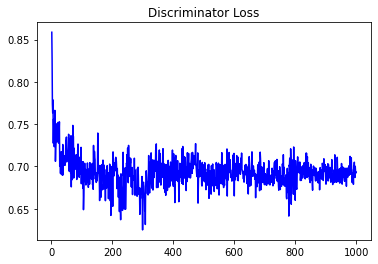

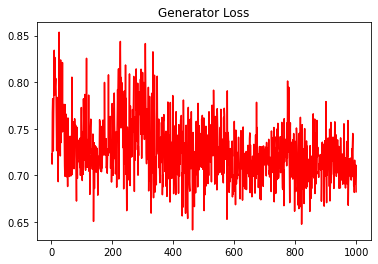

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.510303742385935


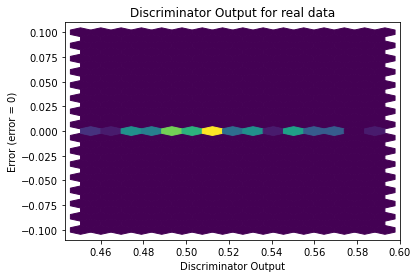

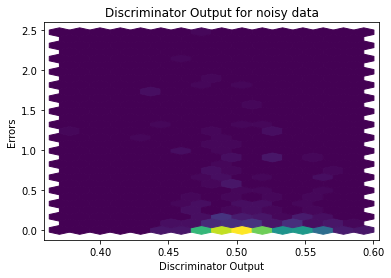

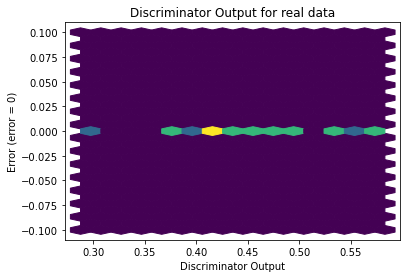

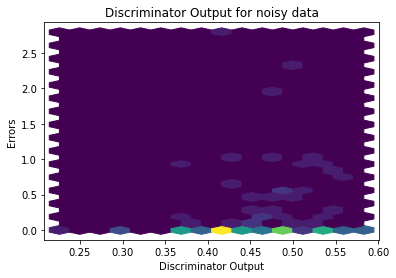

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

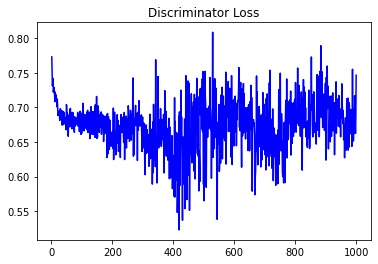

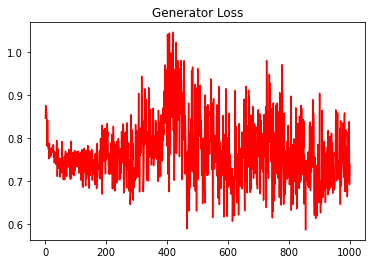

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.2530161741785706


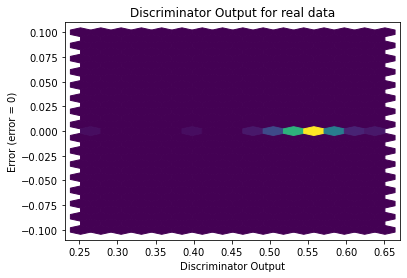

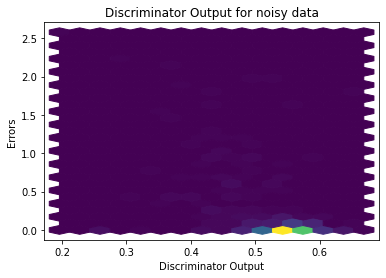

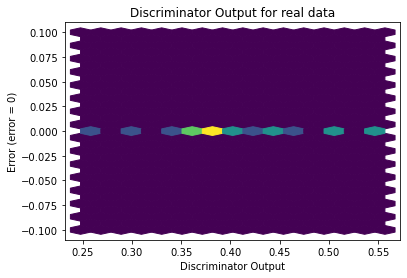

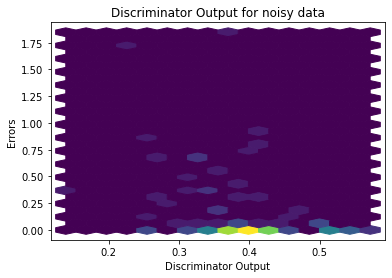

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


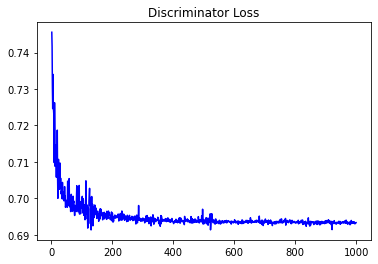

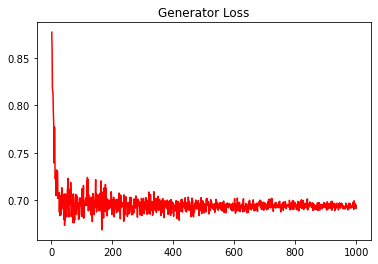

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.40766239921748637


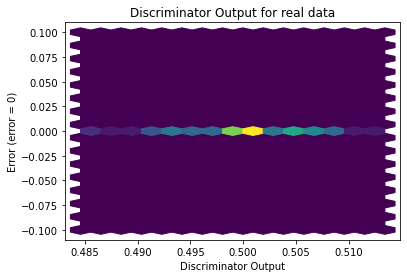

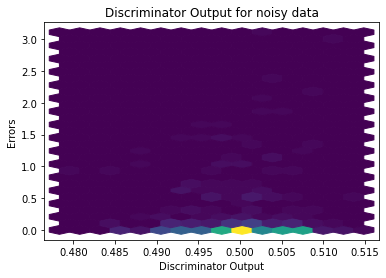

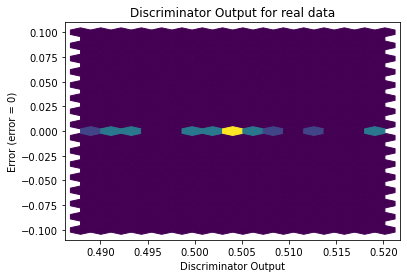

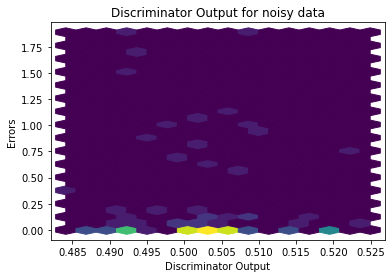

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


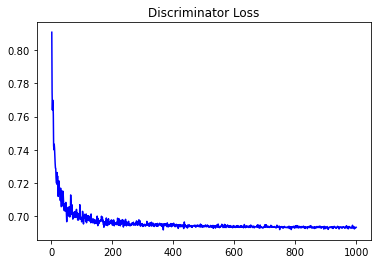

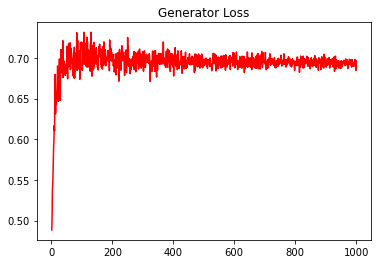

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3464733834043145


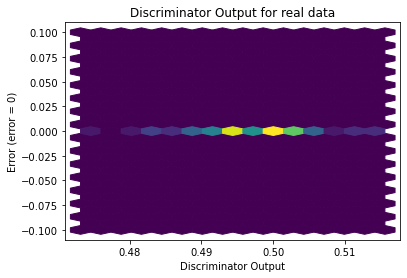

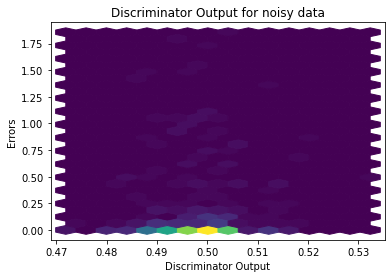

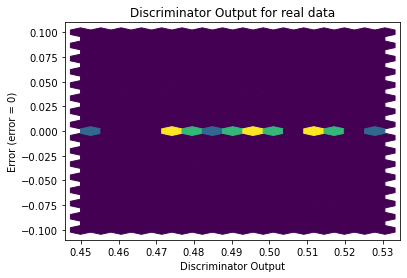

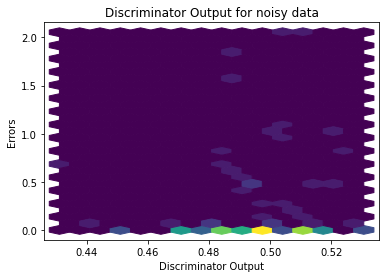

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8854]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0253]], requires_grad=True)
